In [3]:
import numpy as np
from sklearn import preprocessing

In [29]:
X_train = np.array([[ 1., -1.,  20000.],
                   [ 2.,  0.2232323,  122220.],
                   [ 0.,  -10001., -1.]])

In [37]:
#Create a transformer object
transformer = preprocessing.Normalizer()

In [38]:
import pandas as pd

In [39]:
df = pd.DataFrame(X_train)

In [40]:
df.corr()

,0,1,2
0,1.000000,0.866078,0.932162
1,0.866078,1.000000,0.626339
2,0.932162,0.626339,1.000000


In [41]:
X_tf = transformer.fit_transform(X_train)

In [42]:
df = pd.DataFrame(X_tf)

In [43]:
df.corr()

,0,1,2
0,1.000000,0.751475,0.751504
1,0.751475,1.000000,1.000000
2,0.751504,1.000000,1.000000


In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
pol = PolynomialFeatures(10)

In [52]:
pol.fit_transform([[2,3],[4,5],[6,7]])[0]

array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
         4.00000000e+00,   6.00000000e+00,   9.00000000e+00,
         8.00000000e+00,   1.20000000e+01,   1.80000000e+01,
         2.70000000e+01,   1.60000000e+01,   2.40000000e+01,
         3.60000000e+01,   5.40000000e+01,   8.10000000e+01,
         3.20000000e+01,   4.80000000e+01,   7.20000000e+01,
         1.08000000e+02,   1.62000000e+02,   2.43000000e+02,
         6.40000000e+01,   9.60000000e+01,   1.44000000e+02,
         2.16000000e+02,   3.24000000e+02,   4.86000000e+02,
         7.29000000e+02,   1.28000000e+02,   1.92000000e+02,
         2.88000000e+02,   4.32000000e+02,   6.48000000e+02,
         9.72000000e+02,   1.45800000e+03,   2.18700000e+03,
         2.56000000e+02,   3.84000000e+02,   5.76000000e+02,
         8.64000000e+02,   1.29600000e+03,   1.94400000e+03,
         2.91600000e+03,   4.37400000e+03,   6.56100000e+03,
         5.12000000e+02,   7.68000000e+02,   1.15200000e+03,
         1.72800000e+03,

In [53]:
from sklearn.preprocessing import FunctionTransformer

In [54]:
def add_ten(x):
    return x+10

In [55]:
ten_transformer = FunctionTransformer(add_ten)

In [56]:
ten_transformer.transform(X_train)

array([[  1.10000000e+01,   9.00000000e+00,   2.00100000e+04],
       [  1.20000000e+01,   1.02232323e+01,   1.22230000e+05],
       [  1.00000000e+01,  -9.99100000e+03,   9.00000000e+00]])

In [57]:
X_train

array([[  1.00000000e+00,  -1.00000000e+00,   2.00000000e+04],
       [  2.00000000e+00,   2.23232300e-01,   1.22220000e+05],
       [  0.00000000e+00,  -1.00010000e+04,  -1.00000000e+00]])

### Detecting Outliers

In [58]:
from sklearn.covariance import EllipticEnvelope

In [59]:
from sklearn.datasets import make_blobs

In [60]:
features, target = make_blobs(n_samples=100, n_features=2, centers=1)

In [62]:
import matplotlib.pyplot as plt

In [63]:
%matplotlib inline

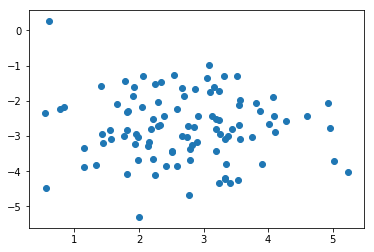

In [64]:
plt.scatter(features[:,0], features[:,1])

In [69]:
features[0,0] = 10
features[0,1] = 10

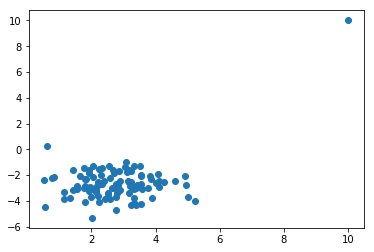

In [70]:
plt.scatter(features[:,0], features[:,1])

In [74]:
outlier_detect =EllipticEnvelope(contamination=.3)

In [75]:
outlier_detect.fit(features)

EllipticEnvelope(assume_centered=False, contamination=0.3, random_state=None,
         store_precision=True, support_fraction=None)

In [77]:
o = outlier_detect.predict(features)

In [80]:
features[np.where(o != -1)]

array([[ 3.32436281, -3.09008677],
       [ 2.21620926, -3.65053945],
       [ 1.82979866, -2.28426096],
       [ 2.05420299, -2.17468364],
       [ 2.84512909, -2.74229389],
       [ 2.38043232, -2.42372202],
       [ 3.54643627, -2.69604532],
       [ 2.58229392, -2.23811352],
       [ 1.9318438 , -3.22468416],
       [ 3.16421382, -1.60026458],
       [ 2.69474593, -1.86921795],
       [ 1.81176845, -2.32927885],
       [ 2.18741813, -2.81129548],
       [ 3.2380719 , -2.54805135],
       [ 3.10002488, -1.74263449],
       [ 2.7616545 , -2.73010662],
       [ 3.13795785, -2.42977586],
       [ 1.98160316, -3.03377913],
       [ 2.82721138, -3.26219582],
       [ 2.51325876, -3.45657846],
       [ 3.56766524, -3.09365739],
       [ 3.18514716, -2.50923283],
       [ 1.91509258, -1.87695302],
       [ 2.24824582, -1.51503268],
       [ 4.00789681, -2.65339673],
       [ 2.24288052, -4.1062041 ],
       [ 2.15889981, -3.17127413],
       [ 1.77328339, -3.0045443 ],
       [ 2.34215118,

In [83]:
c = pd.Series(o)

In [85]:
def f(x):
    if x == -1:
        return 1
    else:
        return 0
c = c.map(f)

In [87]:
pd.DataFrame({ 'X':features[:,0],  'Y':features[:,1], 'Z':c})

,X,Y,Z
0,10.000000,10.000000,1
1,3.324363,-3.090087,0
2,0.541468,-2.351624,1
3,2.216209,-3.650539,0
4,1.829799,-2.284261,0
5,2.054203,-2.174684,0
6,2.845129,-2.742294,0
7,2.380432,-2.423722,0
8,3.546436,-2.696045,0
9,0.778925,-2.232957,1


### Text Cleaning Techniques
* White Spaces
* Same case
* Content removal

In [89]:
sentiment = pd.read_csv(r'D:data/Sentiment.csv')

In [92]:
sentiment.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [94]:
tweet_data = sentiment[['text','sentiment']]

In [108]:
import re
def cleanupText(t):
    r = re.sub(r'@\w+:','',t)
    r = re.sub(r'RT ','',r)
    r = re.sub(r'@','',r)
    r = re.sub(r'-','',r)
    r = re.sub(r'#\w+','',r)
    return r.lower()
    

In [109]:
tweet_data.text = tweet_data.text.map(cleanupText)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [110]:
tweet_data.head()

,text,sentiment
0,how did everyone feel about the climate chang...,Neutral
1,didn't catch the full last night. here are s...,Positive
2,no mention of tamir rice and the was held in...,Neutral
3,that carly fiorina is trending hours after h...,Positive
4,w/ realdonaldtrump delivered the highest rat...,Positive


In [104]:
tweet_data_sample  = tweet_data.sample(n=100)

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
cv = CountVectorizer(stop_words='english')

In [118]:
o = cv.fit_transform(tweet_data_sample.text)

In [121]:
o[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
le = LabelEncoder()

In [127]:
t = le.fit_transform(tweet_data_sample.sentiment)

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
l = LogisticRegression()

In [128]:
l.fit(o,t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)